# 1.决策树回归

In [1]:
# 导入所需要的库
import pandas as pd

# 读取文件
data = pd.read_csv('F:/学习库/大学学习/本科/大三上/机器学习与数据挖掘/期末项目/代码/ffjdata.csv')

# 检查特征的数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   senior      2237 non-null   int64
 1   min_s_mon   2237 non-null   int64
 2   max_s_mon   2237 non-null   int64
 3   min_s_year  2237 non-null   int64
 4   max_s_year  2237 non-null   int64
 5   portion     2237 non-null   int64
 6   s_salary    2237 non-null   int64
 7   edu         2237 non-null   int64
 8   min_exp     2237 non-null   int64
 9   csize       2237 non-null   int64
 10  stack       2237 non-null   int64
 11  binsurance  2237 non-null   int64
 12  minsurance  2237 non-null   int64
 13  paleave     2237 non-null   int64
 14  fpe         2237 non-null   int64
 15  ebenefit    2237 non-null   int64
 16  cclass      2237 non-null   int64
 17  internet    2237 non-null   int64
 18  jclass1     2237 non-null   int64
dtypes: int64(19)
memory usage: 332.2 KB


In [2]:
data.columns

Index(['senior', 'min_s_mon', 'max_s_mon', 'min_s_year', 'max_s_year',
       'portion', 's_salary', 'edu', 'min_exp', 'csize', 'stack', 'binsurance',
       'minsurance', 'paleave', 'fpe', 'ebenefit', 'cclass', 'internet',
       'jclass1'],
      dtype='object')

In [3]:
data.head()

,senior,min_s_mon,max_s_mon,min_s_year,max_s_year,portion,s_salary,edu,min_exp,csize,stack,binsurance,minsurance,paleave,fpe,ebenefit,cclass,internet,jclass1
0,1,4,6,48,72,12,56,1,0,1,0,0,0,0,0,0,1,1,6
1,1,15,25,195,325,13,240,2,1,2,0,1,0,1,1,5,1,0,2
2,1,5,7,65,91,13,74,1,0,4,0,1,0,1,1,7,4,1,5
3,1,10,13,120,156,12,132,3,0,2,1,1,1,1,1,5,2,1,6
4,1,9,14,117,182,13,139,1,1,1,0,1,0,1,1,8,1,1,3


In [4]:
# 导入所需要的库
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [5]:
# 数据预处理

# 不考虑min_s_mon、max_s_mon、min_s_year、max_s_year

# 连续变量
# ebenefit

# 分类变量列表
data['edu'] = data['edu'].apply(str)
data['min_exp'] = data['min_exp'].apply(str)
data['csize'] = data['csize'].apply(str)
data['cclass']= data['cclass'].apply(str)
data['jclass1'] = data['jclass1'].apply(str)

# 虚拟变量列表
data['senior'] = data['senior'].apply(str)
data['stack'] = data['stack'].apply(str)
data['binsurance'] = data['binsurance'].apply(str)
data['minsurance'] = data['minsurance'].apply(str)
data['paleave'] = data['paleave'].apply(str)
data['fpe'] = data['fpe'].apply(str)
data['internet'] = data['internet'].apply(str)
data['jclass1'] = data['jclass1'].apply(str) # 对portion的处理

In [6]:
# 删除缺失值
data=data.dropna()

In [7]:
data.describe()

,min_s_mon,max_s_mon,min_s_year,max_s_year,portion,s_salary,ebenefit
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,10.811354,17.638802,143.554761,234.872150,12.973178,175.202056,4.578453
std,8.027858,13.602098,115.186833,196.622607,0.927225,142.425480,3.171843
min,1.000000,2.000000,12.000000,26.000000,12.000000,40.000000,0.000000
25%,5.000000,9.000000,65.000000,108.000000,12.000000,81.000000,2.000000
50%,9.000000,13.000000,117.000000,169.000000,13.000000,131.000000,5.000000
75%,14.000000,22.000000,180.000000,286.000000,13.000000,217.000000,7.000000
max,75.000000,100.000000,1125.000000,1600.000000,16.000000,1288.000000,16.000000


In [8]:
data.head()

,senior,min_s_mon,max_s_mon,min_s_year,max_s_year,portion,s_salary,edu,min_exp,csize,stack,binsurance,minsurance,paleave,fpe,ebenefit,cclass,internet,jclass1
0,1,4,6,48,72,12,56,1,0,1,0,0,0,0,0,0,1,1,6
1,1,15,25,195,325,13,240,2,1,2,0,1,0,1,1,5,1,0,2
2,1,5,7,65,91,13,74,1,0,4,0,1,0,1,1,7,4,1,5
3,1,10,13,120,156,12,132,3,0,2,1,1,1,1,1,5,2,1,6
4,1,9,14,117,182,13,139,1,1,1,0,1,0,1,1,8,1,1,3


# 2.探索性分析

array([[<AxesSubplot:title={'center':'min_s_mon'}>,
        <AxesSubplot:title={'center':'max_s_mon'}>,
        <AxesSubplot:title={'center':'min_s_year'}>],
       [<AxesSubplot:title={'center':'max_s_year'}>,
        <AxesSubplot:title={'center':'portion'}>,
        <AxesSubplot:title={'center':'s_salary'}>],
       [<AxesSubplot:title={'center':'ebenefit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

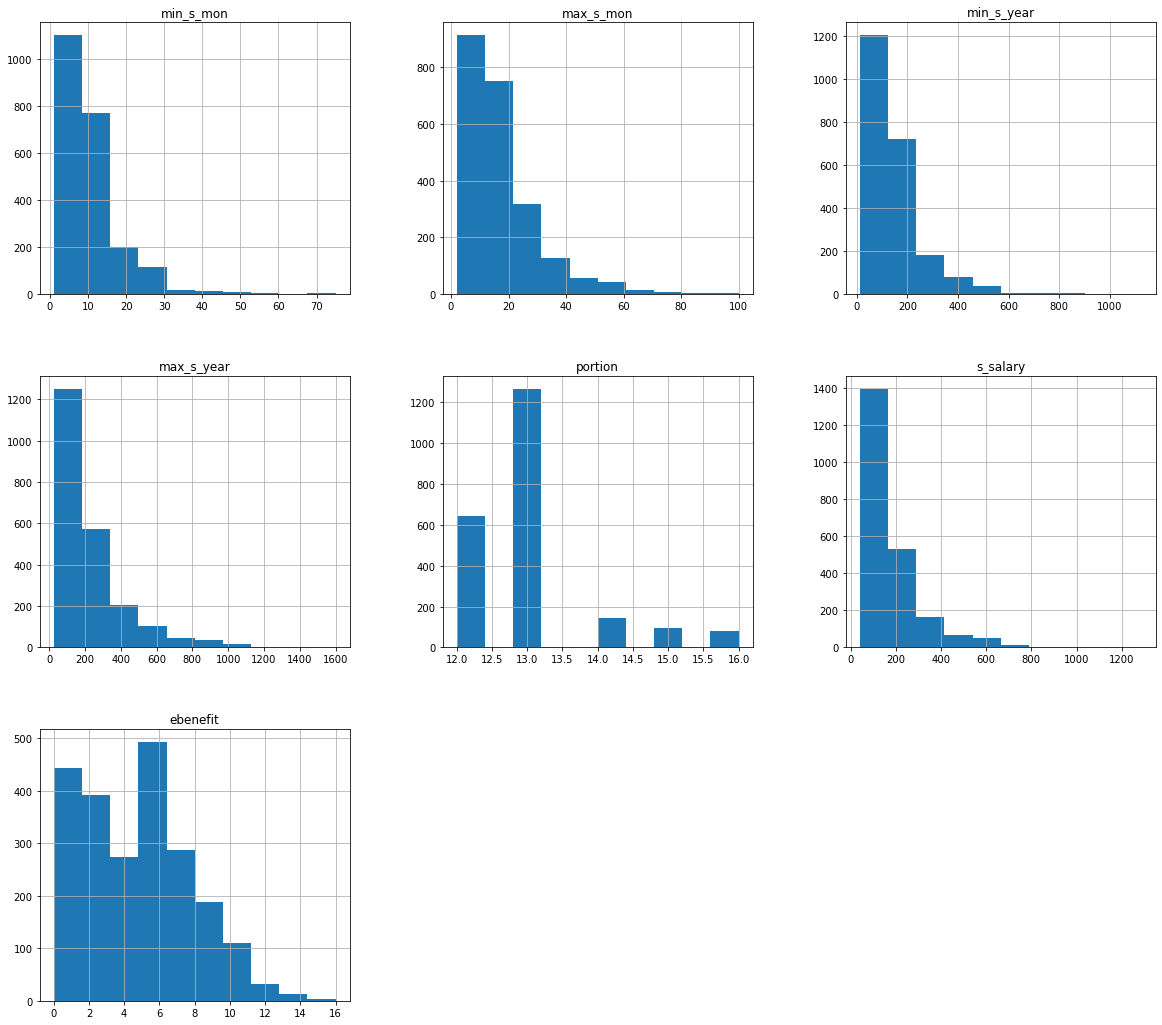

In [9]:
# 绘制直方图
%matplotlib inline
data.hist(figsize = (20, 18))

<AxesSubplot:xlabel='senior', ylabel='s_salary'>

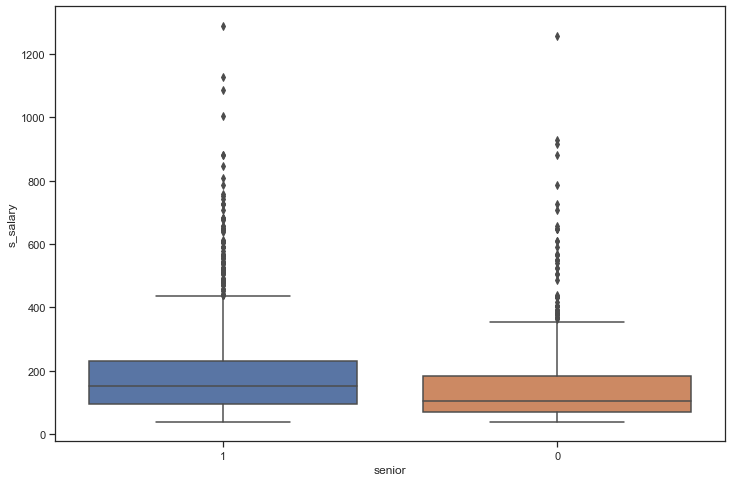

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "senior", data = data) 

<AxesSubplot:xlabel='stack', ylabel='s_salary'>

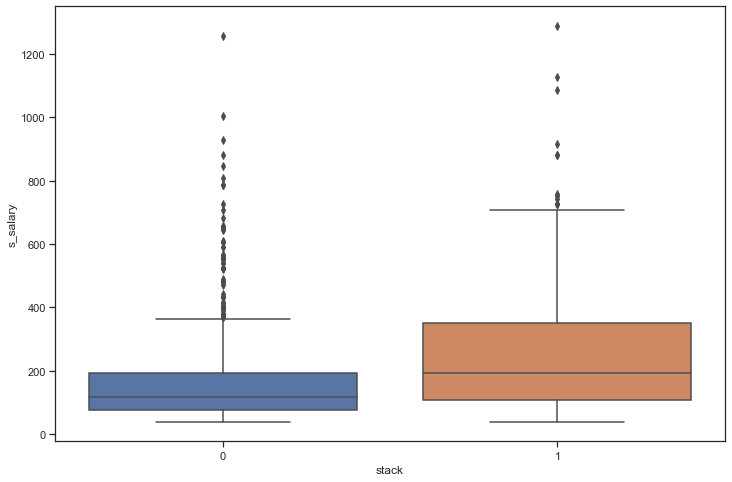

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "stack", data = data) 

<AxesSubplot:xlabel='binsurance', ylabel='s_salary'>

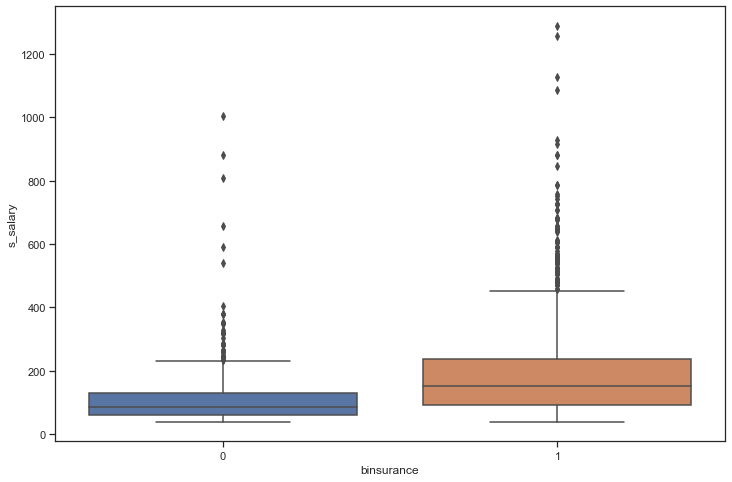

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "binsurance", data = data)

<AxesSubplot:xlabel='minsurance', ylabel='s_salary'>

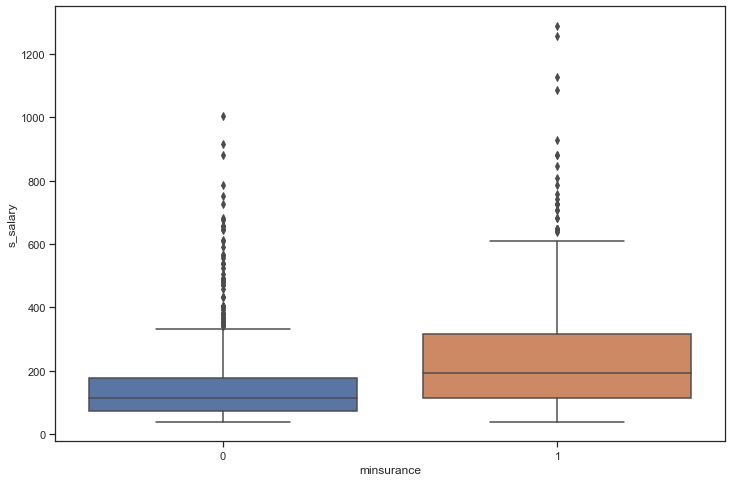

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "minsurance", data = data) 

<AxesSubplot:xlabel='paleave', ylabel='s_salary'>

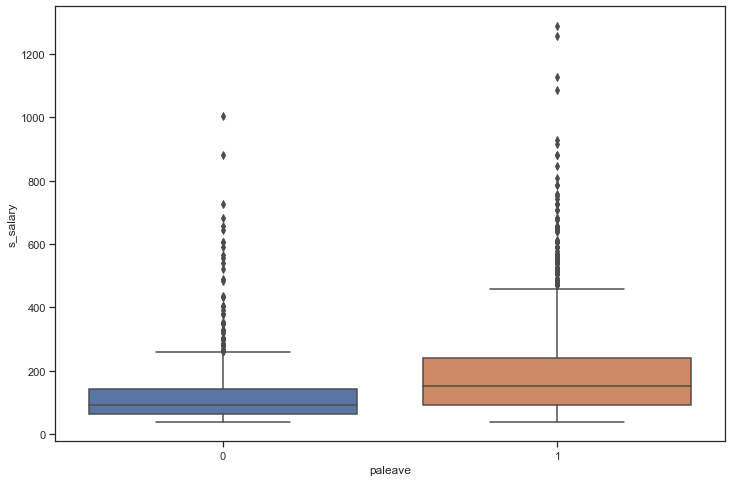

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "paleave", data = data) 

<AxesSubplot:xlabel='fpe', ylabel='s_salary'>

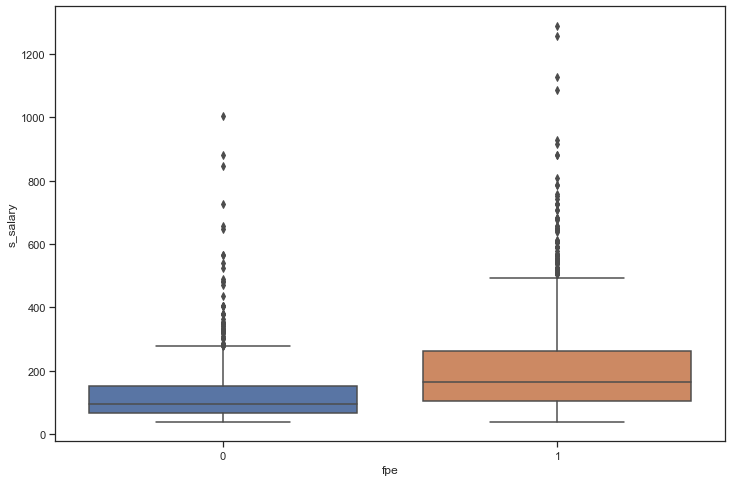

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "fpe", data = data) 

<AxesSubplot:xlabel='internet', ylabel='s_salary'>

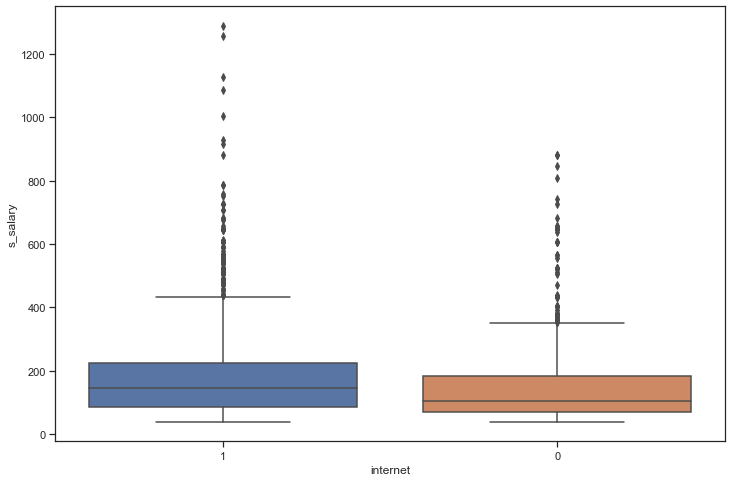

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "internet", data = data) 

<AxesSubplot:xlabel='jclass1', ylabel='s_salary'>

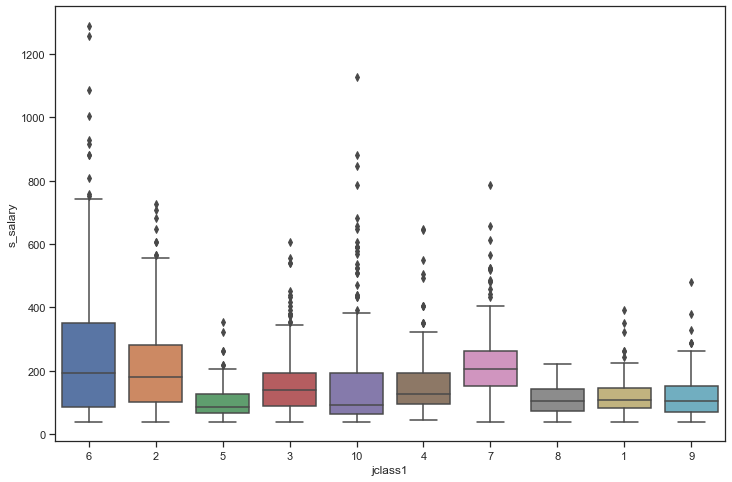

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(y = "s_salary", x = "jclass1", data = data) 

# 3.构建训练集和测试集

In [18]:
# 数据预处理

# 对y
data['s_salary_log'] = data['s_salary'].apply(np.log)
y = data['s_salary_log']# 设置y值，把工资作为连续变量取对数作为y值

# 对特征
features = ['senior','edu','min_exp','csize','stack','binsurance','minsurance','paleave','fpe','ebenefit','cclass','internet','jclass1']

# 提取特征列
X = data[features]

# 处理分类变量，转换成虚拟变量
X = pd.get_dummies(X, columns=features, drop_first = True)

# 查看前几行数据
X.head()
X.describe()

,senior_1,edu_1,edu_2,edu_3,min_exp_1,min_exp_3,min_exp_5,csize_2,csize_3,csize_4,...,internet_1,jclass1_10,jclass1_2,jclass1_3,jclass1_4,jclass1_5,jclass1_6,jclass1_7,jclass1_8,jclass1_9
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,0.605275,0.448815,0.356281,0.073312,0.309343,0.188198,0.146178,0.262852,0.173000,0.228878,...,0.673223,0.122932,0.127850,0.067501,0.117568,0.080018,0.173000,0.094770,0.071524,0.082253
std,0.488901,0.497484,0.479007,0.260707,0.462326,0.390958,0.353363,0.440281,0.378331,0.420204,...,0.469140,0.328433,0.333997,0.250944,0.322168,0.271382,0.378331,0.292962,0.257756,0.274811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# 划分训练集和测试集，20%为测试集，80%为训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 进行决策树回归预测
regressor = DecisionTreeRegressor(random_state=0)

# 需要训练数据来训练模型，所以将其作为参数传递
regressor.fit(X_train, y_train)

# 计算相关指标
# predict(X) 用回归做预测
y_pred = regressor.predict(X_test)
# 均方误差：越小越好
mse = mean_squared_error(y_test, y_pred)
# 可决系数：检查模型的准确性，越靠近1越好
r2 = r2_score(y_test, y_pred)

mse, r2

(0.25595638292628753, 0.4399782345777521)

## 微调决策树回归模型：尝试使用超参数手动调参

In [20]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.2352087919440595, 0.4853730881746332)

## 由于这不是一个很大的改进，则尝试修改，不同深度结果如下

In [21]:
regressor = DecisionTreeRegressor(max_depth=10,random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
# mse降低，r2提高。

(0.22060552273347375, 0.5173244250030014)

In [22]:
regressor = DecisionTreeRegressor(max_depth=9,random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
# mse又降低，r2又提高。

(0.20639372204106227, 0.5484192452321397)

In [23]:
regressor = DecisionTreeRegressor(max_depth=7,random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
# mse较以下升高了，r2较以下降低了，非更优。

(0.19415867081245541, 0.5751890210460497)

In [24]:
regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
# mse再次降低，r2再次提高。
# 目前为止是最优的结果。

(0.1832565741948653, 0.5990423484168503)

## 进一步修改其他超参数来限制树的大小

1.min_samples_split：指定分割内部节点的最小样本数。默认值为2，因此增加该值将限制树的大小。

2.min_samples_leaf：指定叶节点上需要多少个样本。默认值为1，因此增加该值也会限制树的大小。

3.max_leaf_nodes：控制模型可以生成的叶节点数。减少叶节点将有助于防止过度拟合。

4.max_features：指定每次分割时将考虑的最大特征数。默认值是数据集中的特征数，减小该值有助于防止过度拟合。

In [25]:
regressor = DecisionTreeRegressor(max_depth=8,min_samples_split=2,min_samples_leaf=4,max_features=10,random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
# 较以上所有而言结果比较优，用此做进一步分析。

(0.18698163246305696, 0.5908920781098418)

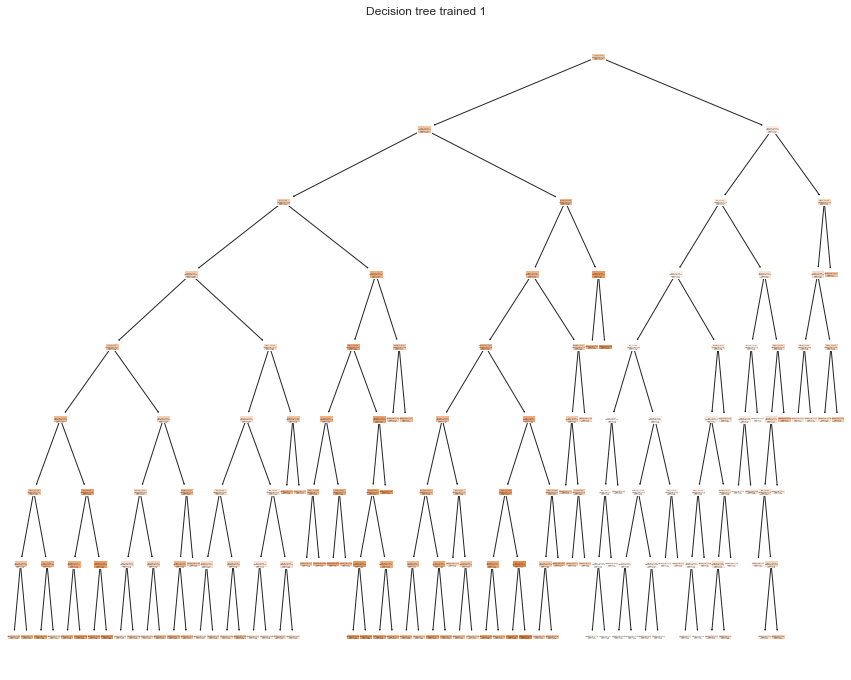

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = [15,12])

plot_tree(regressor, filled=True, feature_names = X.columns, class_names = True)
#filled让树有颜色，feature_names把特征名字画在树上，class_names所有预测值y的数值等于几。
plt.title("Decision tree trained 1")
plt.show()
#下图根节点中，value指的是，每一类的个数有多少个；gini是基尼指数。
#基尼指数=0则代表很纯。
#每个颜色代表一个类。

## 评价以上模型

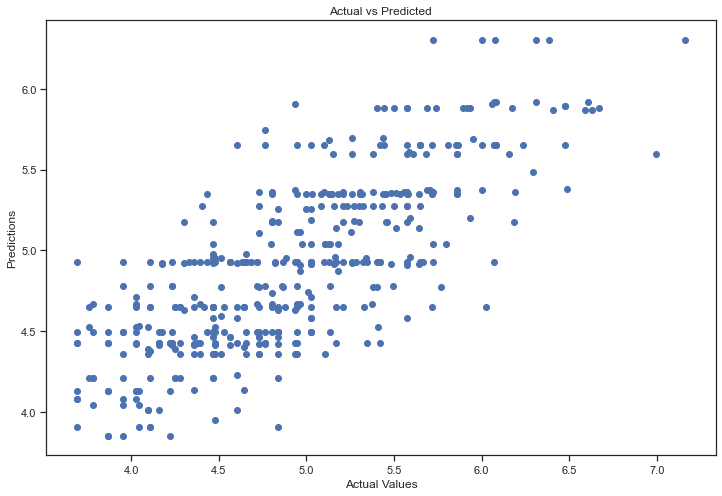

In [27]:
# 可视化实际值与预测值的对比
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted')
plt.show()
# 效果不佳，有待提升。
# 之后不采用手动调参，将采用网格搜索。

## 特征重要性：衡量每个特征对模型结果的影响程度

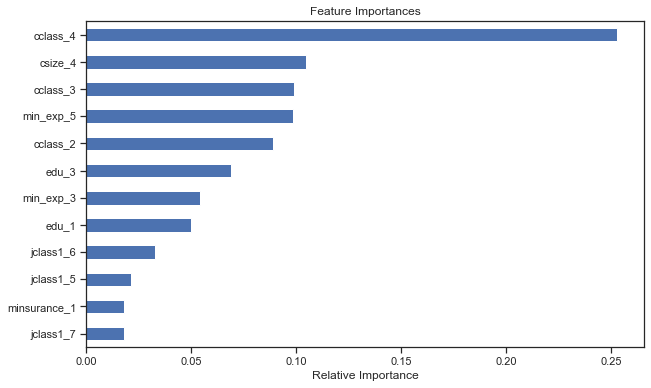

In [28]:
# 做特征的重要性
importances = regressor.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
# 查看全部特征
weights.sort_values()[-12:].plot(kind = 'barh')
plt.xlabel('Relative Importance')
plt.show()

### 可以看到，城市等级是对薪资影响最大的特征

In [29]:
weights.sort_values(ascending = False) ## 从大到小排序重要性

cclass_4        0.252960
csize_4         0.104679
cclass_3        0.098941
min_exp_5       0.098644
cclass_2        0.089167
edu_3           0.068883
min_exp_3       0.054100
edu_1           0.049900
jclass1_6       0.032801
jclass1_5       0.021341
minsurance_1    0.018172
jclass1_7       0.017972
paleave_1       0.015828
edu_2           0.014476
ebenefit_12     0.012700
min_exp_1       0.011509
senior_1        0.007594
internet_1      0.005411
ebenefit_3      0.004445
fpe_1           0.004325
ebenefit_7      0.002689
ebenefit_4      0.002399
jclass1_4       0.002340
ebenefit_5      0.002292
csize_2         0.001969
jclass1_10      0.001485
binsurance_1    0.001040
ebenefit_2      0.000892
csize_3         0.000806
stack_1         0.000240
jclass1_8       0.000000
jclass1_3       0.000000
jclass1_2       0.000000
ebenefit_8      0.000000
ebenefit_16     0.000000
ebenefit_15     0.000000
ebenefit_14     0.000000
ebenefit_13     0.000000
ebenefit_11     0.000000
ebenefit_10     0.000000


# 4.再采用网格搜索

### 对决策树进行网格搜索时，需要控制如下参数：

1. **max_depth**: 决策树的最大深度。过深的树可能导致过拟合，而太浅的树可能无法捕获数据中的复杂模式。
2. **min_samples_split**: 用于拆分内部节点所需的最小样本数。如果拆分会减少父节点的样本数，则不会进行拆分。
3. **min_samples_leaf**: 叶节点（即最终节点）所需的最小样本数。如果一个叶节点的样本数少于此值，则该节点会被视为噪声并被移除。
4. **max_features**: 用于拆分时考虑的特征数量。可以设置为：
	* 'auto'：选择所有特征的平方根数作为考虑的特征数。
	* 'sqrt'：考虑特征数的平方根。
	* 'log2'：考虑特征数的对数值。
5. **criterion**: 定义如何计算每个分裂的最佳划分。常见的值有 'gini'为基尼不纯度的标准 和 'entropy'为信息熵的标准。
   * '基尼不纯度'：是指在一个样本集中，随机选取两个样本，其类别不一致的概率。基尼不纯度越小，说明划分后的纯度越高，分类效果越好。在构建决策树时，基于Gini系数的标准就是选择能够使得划分后子节点纯度最高的特征进行分裂。
   * '信息熵'：是衡量随机变量不确定性的度量，定义为一个随机变量的不确定性或混乱程度的度量。在决策树中，信息熵可以帮助衡量一个节点的样本集合的混乱程度或不确定性，进而评估分裂的效果。
   * 基尼系数和信息熵都是评估数据集纯度的方式，而基尼系数关注的是类别不一致的概率，信息熵关注的是数据的混乱程度。
6. **random_state**: 用于初始化树和决定拆分的随机性。

尝试不同的参数组合，并基于某种评估标准（如交叉验证得分）找到最佳的参数组合。

评估标准是 R² 分数，使用 `GridSearchCV` 的 `scoring` 参数指定。

### 关于'max_features' : ['auto', 'sqrt', 'log2']的详细分析：

* `max_features` 是一个控制考虑在每次分裂时使用的特征数的参数。
* `'auto'` 表示在树的每个节点分裂时，选择所有特征的平方根数作为考虑的特征数。
* `'sqrt'` 表示在每个节点分裂时考虑特征数的平方根。
* `'log2'` 表示在每个节点分裂时考虑特征数的对数值。

该重要参数可以控制模型的复杂度和过拟合。

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [ 10, 20, 30, 40, 50],
    'min_samples_split': [ 2, 4, 6, 8, 10],
    'min_samples_leaf': [ 1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
}
# 创建GridSearchCV对象，这里指定交叉验证的折数为5折
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2')

# 训练模型，执行网格搜索
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=8, max_features=10,
                                             min_samples_leaf=4,
                                             random_state=0),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='r2')

In [31]:
# 获取最佳参数组合
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [32]:
# 使用最佳参数重新训练模型
best_rf = DecisionTreeRegressor(**best_params, random_state=0)
best_rf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=0)

In [33]:
# 预测
y_pred_best = best_rf.predict(X_test)
# 评估模型：均方误差和可决系数
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print('Mean Squared Error with best parameters:', mse_best)
print('R-squared with best parameters:', r2_best)

Mean Squared Error with best parameters: 0.19362515130341393
R-squared with best parameters: 0.5763563392192663


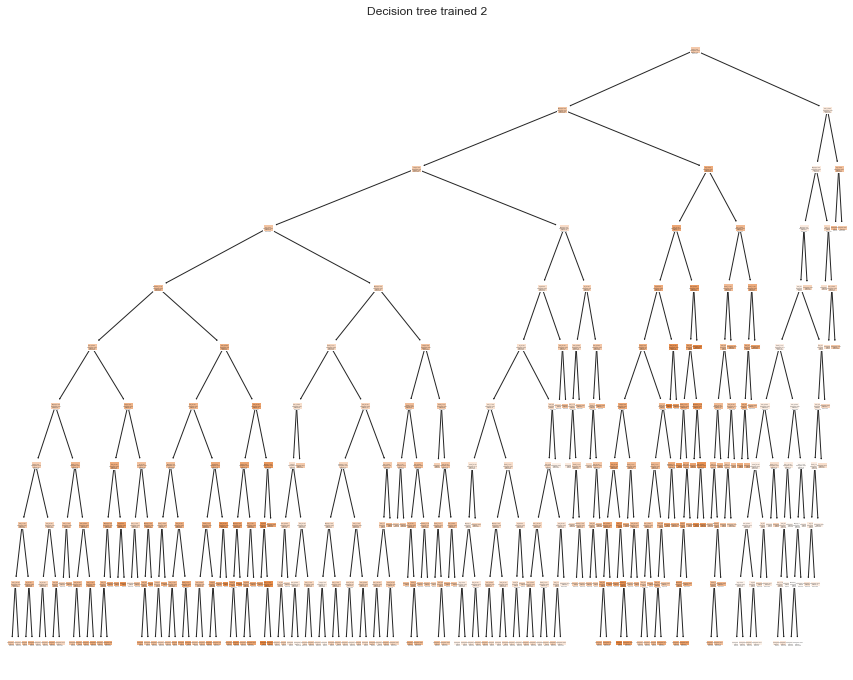

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = [15,12])

plot_tree(best_rf, filled=True, feature_names = X.columns, class_names = True)
#filled让树有颜色，feature_names把特征名字画在树上，class_names所有预测值y的数值等于几。
plt.title("Decision tree trained 2")
plt.show()
#下图根节点中，value指的是，每一类的个数有多少个；gini是基尼指数。
#基尼指数=0则代表很纯。
#每个颜色代表一个类。

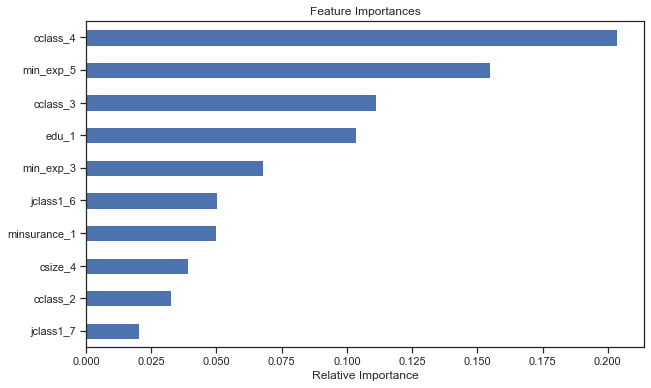

In [35]:
# 做特征的重要性
importances = best_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
weights.sort_values()[-10:].plot(kind = 'barh') # [-10:]表示这么多特征中只想看前十重要的特征
plt.xlabel('Relative Importance')
plt.show()

### 可以看到，城市等级仍然是对薪资影响最大的特征

In [36]:
weights.sort_values(ascending = False) ## 从大到小排序重要性

cclass_4        0.203679
min_exp_5       0.155003
cclass_3        0.111041
edu_1           0.103617
min_exp_3       0.067810
jclass1_6       0.050221
minsurance_1    0.049694
csize_4         0.039008
cclass_2        0.032410
jclass1_7       0.020345
fpe_1           0.020327
internet_1      0.020065
stack_1         0.019038
edu_3           0.017352
senior_1        0.016712
min_exp_1       0.007686
csize_3         0.007638
paleave_1       0.006875
csize_2         0.006222
jclass1_8       0.005533
jclass1_10      0.005035
jclass1_5       0.004826
jclass1_2       0.004364
edu_2           0.003893
jclass1_4       0.003730
ebenefit_11     0.003487
jclass1_9       0.003375
ebenefit_4      0.002338
ebenefit_5      0.002242
binsurance_1    0.001958
ebenefit_3      0.001910
ebenefit_7      0.001448
ebenefit_6      0.001119
ebenefit_1      0.000000
ebenefit_2      0.000000
jclass1_3       0.000000
ebenefit_13     0.000000
ebenefit_14     0.000000
ebenefit_9      0.000000
ebenefit_10     0.000000


### 后剪枝: 防止过拟合，设定ccp_alpha = 0.05

In [37]:
best_rf = DecisionTreeRegressor(ccp_alpha = 0.05)
best_rf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.05)

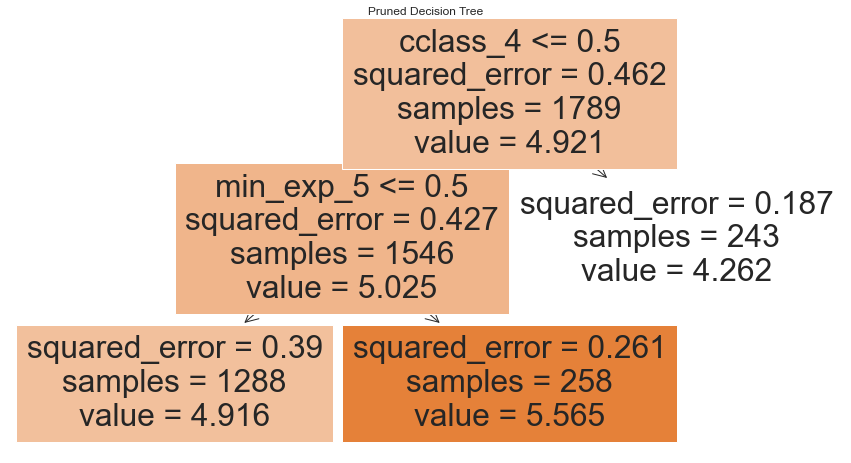

In [38]:
plt.figure(figsize = [15,8])

plot_tree(best_rf, filled=True, feature_names = X.columns, class_names = True)
plt.title("Pruned Decision Tree")
plt.show()

# 5.由以上汇总结果

## 未采用网格搜索手动调参时所得结果：

max_depth=8,min_samples_split=2,min_samples_leaf=4,max_features=10,random_state=0。

### 结果为mse0.18698163246305696, r2为0.5908920781098418。


## 采用网格搜索的最优方案后所得结果：

max_depth=10,min_samples_split=10,min_samples_leaf=4,max_features为auto,random_state=0。

### 结果为mse0.19362515130341393，r2为0.5763563392192663。

# 6.分析


## 手动调整参数的结果：

max_depth=8: 树的深度为8层。

min_samples_split=2: 内部节点再划分所需的最小样本数。

min_samples_leaf=4: 叶子节点所需的最小样本数。

max_features=10: 考虑的最大特征数。

random_state=0: 随机种子。

### 在这个参数配置下，模型的均方误差（MSE）为0.18698163246305696，R^2（决定系数）为0.5908920781098418。


## 使用网格搜索（Grid Search）得到的最优参数结果：

max_depth=10: 树的深度为10层。

min_samples_split=10: 内部节点再划分所需的最小样本数。

min_samples_leaf=4: 叶子节点所需的最小样本数。

max_features=auto: 自动选择最大的特征数。

random_state=0: 随机种子。

### 在这个参数配置下，模型的均方误差（MSE）为0.19362515130341393，R^2（决定系数）为0.5763563392192663。


## 结果不同的原因：

1.模型复杂度：通过增加max_depth的值，模型的结构变得更加复杂。这可能导致模型对训练数据的过拟合，从而在测试数据上的性能下降。增加树的深度通常会使模型更容易陷入过拟合，因为它可以学习更多的不规则性和噪声。

2.特征选择：max_features=auto表示模型在选择特征时更加灵活，可能考虑更多的特征，这可能导致模型在某些情况下更复杂。而手动设置的max_features=10可能限制了特征的选择，从而使模型较为简单。

3.最小样本分裂和叶子节点：min_samples_split和min_samples_leaf的调整没有明显的影响，因为它们在这两种配置中保持不变。这些参数控制树生长的细粒度，通常对模型的整体性能影响较小。

4.随机种子：random_state=0确保了结果的可重复性。但在本例中，它对最终性能的影响可能很小。

5.验证策略：因为只给出了最终的MSE和R^2值，如果要更全面地了解模型性能，通常还需要查看训练和验证过程中的其他指标，如训练集上的MSE和R^2、验证集上的MSE和R^2等。这有助于判断是否存在过拟合或欠拟合的情况。

6.数据集特性：参数调整对模型性能的影响与特定数据集的特性有关。某些参数设置可能更适合特定的数据分布或特性，这会影响模型在训练和测试数据上的表现。

7.网格搜索的配置：使用网格搜索找到了最优参数，但网格搜索的配置（如网格的步长、搜索的参数范围等）也会影响最终结果。更精细或更广泛的网格搜索配置可能会给出不同的结果。

8.其他因素：还可能有其他未考虑到的因素影响结果，例如数据的预处理步骤、特征工程等。

综上所述，应该综合考虑手动调参和网格搜索的结果。